# Ensemble Method - 5
# XGBoost


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.shape

(891, 15)

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df['pclass'].unique()

array([3, 1, 2])

In [8]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [9]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

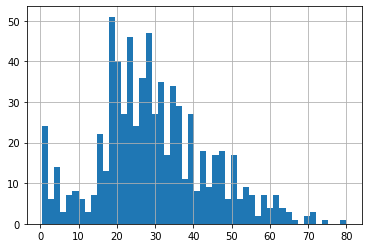

In [10]:
df['age'].hist(bins=50)

# Data Pre-processing

In [11]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)

In [12]:
X = subset[['pclass', 'sex', 'age']].copy()

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
X['sex'] = le.fit_transform(subset['sex'])
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [15]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [17]:
y = subset['survived'].copy()

In [18]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

# Splitting Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        res = clf.predict(X_train)
        print("Train results : \n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,
                                                               res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train,
                                                                           res)))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_train,
                                                                res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train),
                                                       lb.transform(res))))
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy : \t{0:.4f}".format(np.mean(res)))
        print("Average SD : \t\t{0:.4f}".format(np.std(res)))
        
    elif train==False:
        res_test = clf.predict(X_test)
        print("Test results : \n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,
                                                               res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test,
                                                                           res_test)))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test,
                                                                res_test)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test),
                                                       lb.transform(res_test))))

# XGBoost

In [24]:
import xgboost as xgb

In [25]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.3, n_jobs=-1)

In [26]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=True)
print("\t\t #####################################")
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=False)

Train results : 

Accuracy Score: 0.8878

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       301
           1       0.92      0.79      0.85       198

    accuracy                           0.89       499
   macro avg       0.89      0.87      0.88       499
weighted avg       0.89      0.89      0.89       499


Confusion Matrix: 
[[287  14]
 [ 42 156]]

ROC AUC: 0.8707

Average Accuracy : 	0.7896
Average SD : 		0.0327
		 #####################################
Test results : 

Accuracy Score: 0.8140

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       123
           1       0.82      0.72      0.77        92

    accuracy                           0.81       215
   macro avg       0.82      0.80      0.81       215
weighted avg       0.81      0.81      0.81       215


Confusion Matrix: 
[[109  14]
 [ 26  66]]

ROC AUC: 0.8018

